In [52]:
!wget --no-check-certificate -O hotel.csv 'https://docs.google.com/uc?export=download&id=1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr'

--2021-03-21 09:46:55--  https://docs.google.com/uc?export=download&id=1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr
Resolving docs.google.com (docs.google.com)... 74.125.137.100, 74.125.137.139, 74.125.137.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qli68ms7b1n17b05r0j9r3bdtpei3s9u/1616319975000/02898390244786671904/*/1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr?e=download [following]
--2021-03-21 09:46:55--  https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qli68ms7b1n17b05r0j9r3bdtpei3s9u/1616319975000/02898390244786671904/*/1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr?e=download
Resolving doc-0o-8s-docs.googleusercontent.com (doc-0o-8s-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to doc-0o-8s-docs.googleusercontent.com (doc-0o-8s-d

In [53]:
import pandas as pd

df = pd.read_csv('hotel.csv')
df

,hotel,is_canceled,lead_time,adults,children,babies,meal,deposit_type,agent,company
0,Resort Hotel,0,342,2,0.0,0,BB,No Deposit,NaN,NaN
1,Resort Hotel,0,737,2,0.0,0,BB,No Deposit,NaN,NaN
2,Resort Hotel,0,7,1,0.0,0,BB,No Deposit,NaN,NaN
3,Resort Hotel,0,13,1,0.0,0,BB,No Deposit,304.0,NaN
4,Resort Hotel,0,14,2,0.0,0,BB,No Deposit,240.0,NaN
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,0.0,0,BB,No Deposit,394.0,NaN
119386,City Hotel,0,102,3,0.0,0,BB,No Deposit,9.0,NaN
119387,City Hotel,0,34,2,0.0,0,BB,No Deposit,9.0,NaN
119388,City Hotel,0,109,2,0.0,0,BB,No Deposit,89.0,NaN


In [54]:
df.describe()

,is_canceled,lead_time,adults,children,babies,agent,company
count,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,103050.000000,6797.000000
mean,0.370416,104.011416,1.856219,0.103890,0.007991,86.693382,189.266735
std,0.482918,106.863097,0.582704,0.398561,0.098501,110.774548,131.655015
min,0.000000,0.000000,-20.000000,0.000000,0.000000,1.000000,6.000000
25%,0.000000,18.000000,2.000000,0.000000,0.000000,9.000000,62.000000
50%,0.000000,69.000000,2.000000,0.000000,0.000000,14.000000,179.000000
75%,1.000000,160.000000,2.000000,0.000000,0.000000,229.000000,270.000000
max,1.000000,737.000000,55.000000,10.000000,10.000000,535.000000,543.000000


In [55]:
df = df.select_dtypes(include=['number'])
df

,is_canceled,lead_time,adults,children,babies,agent,company
0,0,342,2,0.0,0,NaN,NaN
1,0,737,2,0.0,0,NaN,NaN
2,0,7,1,0.0,0,NaN,NaN
3,0,13,1,0.0,0,304.0,NaN
4,0,14,2,0.0,0,240.0,NaN
...,...,...,...,...,...,...,...
119385,0,23,2,0.0,0,394.0,NaN
119386,0,102,3,0.0,0,9.0,NaN
119387,0,34,2,0.0,0,9.0,NaN
119388,0,109,2,0.0,0,89.0,NaN


In [56]:
df.isnull().sum()

is_canceled         0
lead_time           0
adults              0
children            4
babies              0
agent           16340
company        112593
dtype: int64

In [57]:
df = df.drop(['company'], axis=1)
df

,is_canceled,lead_time,adults,children,babies,agent
0,0,342,2,0.0,0,NaN
1,0,737,2,0.0,0,NaN
2,0,7,1,0.0,0,NaN
3,0,13,1,0.0,0,304.0
4,0,14,2,0.0,0,240.0
...,...,...,...,...,...,...
119385,0,23,2,0.0,0,394.0
119386,0,102,3,0.0,0,9.0
119387,0,34,2,0.0,0,9.0
119388,0,109,2,0.0,0,89.0


In [58]:
df['agent'] = df['agent'].fillna(1000)
df

,is_canceled,lead_time,adults,children,babies,agent
0,0,342,2,0.0,0,1000.0
1,0,737,2,0.0,0,1000.0
2,0,7,1,0.0,0,1000.0
3,0,13,1,0.0,0,304.0
4,0,14,2,0.0,0,240.0
...,...,...,...,...,...,...
119385,0,23,2,0.0,0,394.0
119386,0,102,3,0.0,0,9.0
119387,0,34,2,0.0,0,9.0
119388,0,109,2,0.0,0,89.0


In [59]:
lead_time_mean = df['lead_time'].mean() 
lead_time_mean

104.01141636652986

In [60]:
df['lead_time'] = df['lead_time'].replace({0: lead_time_mean})
df['lead_time'].describe()

count    119390.000000
mean        109.539119
std         103.991426
min           1.000000
25%          27.000000
50%          85.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [61]:
df.describe()

,is_canceled,lead_time,adults,children,babies,agent
count,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000
mean,0.370416,109.539119,1.856219,0.103890,0.007991,211.690703
std,0.482918,103.991426,0.582704,0.398561,0.098501,330.346672
min,0.000000,1.000000,-20.000000,0.000000,0.000000,1.000000
25%,0.000000,27.000000,2.000000,0.000000,0.000000,9.000000
50%,0.000000,85.000000,2.000000,0.000000,0.000000,28.000000
75%,1.000000,160.000000,2.000000,0.000000,0.000000,240.000000
max,1.000000,737.000000,55.000000,10.000000,10.000000,1000.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


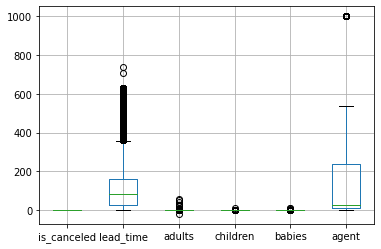

In [62]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib# # box plot.
df.boxplot()